In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange

In [2]:

mode = "CA1_clust4-60_noNA"
stim = np.load("/media/hdd01/sklee/"+mode+"/data/stim_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy")

In [3]:
repeat = 10
#####
duration = 10000
#####
E_no = 2000
I_no = 200
full_e_neural = np.zeros((repeat*duration*5, E_no))
full_i_neural = np.zeros((repeat*duration*5, I_no))

######
bins = np.arange(0,duration+0.1,0.2)
######
print(bins)

for i in tnrange(repeat):
    part_e_neural = np.zeros((duration*5, E_no))
    part_i_neural = np.zeros((duration*5, I_no))
    
    stim_e = stim[np.where(stim[:,0] == i+1)[0]]
    stim_i = stim[np.where(stim[:,0] == -i-1)[0]]
    
    e_counts, _ = np.histogram(stim_e[:,2], bins)
    i_counts, _ = np.histogram(stim_i[:,2], bins)
    
    e_count = 0
    for j in range(e_counts.shape[0]):
        e_bin = e_counts[j]
        for k in range(e_bin):
            e_syn = int(stim_e[e_count,1])
            part_e_neural[j, e_syn] += 1
            e_count += 1
           
    i_count=0
    for j in range(i_counts.shape[0]):
        i_bin = i_counts[j]
        for k in range(i_bin):
            i_syn = int(stim_i[i_count,1])
            part_i_neural[j, i_syn] += 1
            i_count += 1
            
    print(np.sum(part_e_neural), e_count, np.sum(e_counts), stim_e.shape[0])
    print(np.sum(part_i_neural), i_count, np.sum(i_counts), stim_i.shape[0])
    
    full_e_neural[i*duration*5:(i+1)*duration*5] = part_e_neural
    full_i_neural[i*duration*5:(i+1)*duration*5] = part_i_neural
    
print(np.sum(full_e_neural)+np.sum(full_i_neural), stim.shape[0])
print(full_e_neural.shape)
print(full_i_neural.shape)

[0.0000e+00 2.0000e-01 4.0000e-01 ... 9.9996e+03 9.9998e+03 1.0000e+04]


<ipython-input-3-ac1a555bc7d0>:15: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(repeat):


11356.0 11356 11356 11357
14805.0 14805 14805 14806
11394.0 11394 11394 11396
15039.0 15039 15039 15042
11460.0 11460 11460 11463
14811.0 14811 14811 14816
11243.0 11243 11243 11248
14603.0 14603 14603 14610
11402.0 11402 11402 11406
14732.0 14732 14732 14737
11439.0 11439 11439 11439
14858.0 14858 14858 14864
11526.0 11526 11526 11531
14863.0 14863 14863 14865
11086.0 11086 11086 11090
14737.0 14737 14737 14740
11322.0 11322 11322 11324
14960.0 14960 14960 14964
11224.0 11224 11224 11227
14512.0 14512 14512 14515

261372.0 261440
(500000, 2000)
(500000, 200)


In [4]:
np.save("/media/hdd01/sklee/"+mode+"/data/Espikes_neural.npy", full_e_neural)
np.save("/media/hdd01/sklee/"+mode+"/data/Ispikes_neural.npy", full_i_neural)

In [5]:
mode = "CA1_clust4-60_noNA"

e_locs = np.load("/media/hdd01/sklee/"+mode+"/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy")
i_locs = np.load("/media/hdd01/sklee/"+mode+"/data/Ilocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy")

#syn_locs = np.load("/media/hdd01/sklee/CA1_clust25-20/data/synlocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep16_stimseed1.npy")
#e_locs = syn_locs[:2000]
#i_locs = syn_locs[2000:]

e_no = e_locs.shape[0]
i_no = i_locs.shape[0]

In [6]:
print(np.min(e_locs[:,0]))
print(np.max(e_locs[:,0]))
print(np.min(i_locs[:,0]))
print(np.max(i_locs[:,0]))


1.0
152.0
-1.0
152.0


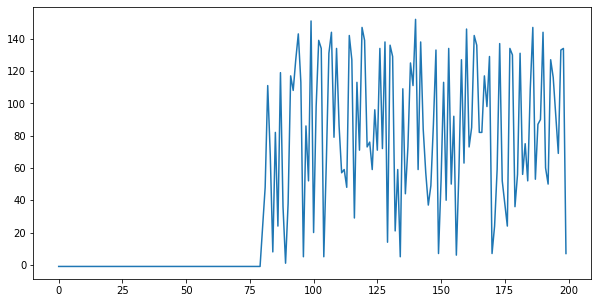

In [7]:
plt.figure(figsize = (10,5))
plt.plot(i_locs[:,0])

In [12]:
sub_no = 11

if sub_no == 1:
    C_syn_e = np.ones((1,2000))
    C_syn_i = np.ones((1,200))
    C_den = np.ones((1,1))


elif sub_no == 6:
    C_syn_e = np.zeros((6,2000))
    C_syn_i = np.zeros((6,200))

    for i in range(2000):
        dend = e_locs[i,0]
        if dend <= 15:
            C_syn_e[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_e[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_e[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_e[4,i] = 1
        elif dend >= 75:
            C_syn_e[5,i] = 1

    for i in range(200):
        dend = i_locs[i,0]
        
        if dend < 0:
            C_syn_i[0,i] = 1
        elif (dend > 0) & (dend <= 15):
            C_syn_i[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_i[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_i[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_i[4,i] = 1
        elif dend >= 75:
            C_syn_i[5,i] = 1

    C_den = np.zeros((6,6))
    C_den[0,1:] = 1
    
elif sub_no == 11:
    C_syn_e = np.zeros((11,2000))
    C_syn_i = np.zeros((11,200))
    
    for i in range(2000):
        dend = e_locs[i,0]
        if dend <= 15:
            C_syn_e[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_e[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_e[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_e[4,i] = 1
        elif (dend >= 75) & (dend <= 89):
            C_syn_e[5,i] = 1
        elif (dend >= 90) & (dend <= 103):
            C_syn_e[6,i] = 1
        elif (dend >= 104) & (dend <= 114):
            C_syn_e[7,i] = 1
        elif (dend >= 115) & (dend <= 127):
            C_syn_e[8,i] = 1
        elif (dend >= 128) & (dend <= 140):
            C_syn_e[9,i] = 1
        elif dend >= 141:
            C_syn_e[10,i] = 1
            
    for i in range(200):
        dend = i_locs[i,0]
        if dend < 0:
            C_syn_i[0,i] = 1
        elif (dend > 0) & (dend <= 15):
            C_syn_i[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_i[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_i[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_i[4,i] = 1
        elif (dend >= 75) & (dend <= 89):
            C_syn_i[5,i] = 1
        elif (dend >= 90) & (dend <= 103):
            C_syn_i[6,i] = 1
        elif (dend >= 104) & (dend <= 114):
            C_syn_i[7,i] = 1
        elif (dend >= 115) & (dend <= 127):
            C_syn_i[8,i] = 1
        elif (dend >= 128) & (dend <= 140):
            C_syn_i[9,i] = 1
        elif dend >= 141:
            C_syn_i[10,i] = 1
    
    C_den = np.zeros((11,11))
    C_den[0,1:6] = 1
    C_den[5,6:] = 1
    
print(np.var(np.sum(C_syn_e, 0)))
print(np.var(np.sum(C_syn_i, 0)))
print(np.sum(C_syn_e))
print(np.sum(C_syn_i))
print(C_den)

0.0
0.0
2000.0
200.0
[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
np.save("/media/hdd01/sklee/"+mode+"/data/handsub"+str(sub_no)+"_C_syn_e.npy", C_syn_e)
np.save("/media/hdd01/sklee/"+mode+"/data/handsub"+str(sub_no)+"_C_syn_i.npy", C_syn_i)
np.save("/media/hdd01/sklee/"+mode+"/data/handsub"+str(sub_no)+"_C_den.npy", C_den)

In [5]:
mode = "CA1_clust4-60"


v = np.load("/media/hdd01/sklee/"+mode+"/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy")
v = v[:,:50000]
print(v.shape)

spk_loc = np.zeros_like(v)

for i in tnrange(v.shape[0]):
    part_v = v[i]
    part_dv = np.diff(part_v)
    high_dv = np.zeros((part_dv.shape[0]))
    
    for j in range(part_dv.shape[0]):
        if part_dv[j] >= 0.08:
            neg_count = 0
            
            if part_dv.shape[0] - j <= 15:
                for k in range(part_dv.shape[0]-j):
                    if part_dv[j+k] <= -0.03:
                        neg_count += 1
            else:
                for k in range(15):
                    if part_dv[j+k] <= -0.03:
                        neg_count += 1
                    
            if neg_count > 0:
                high_dv[j] += 1
    high_dv_diff = np.diff(high_dv)
    unique_high_dv = np.zeros((v.shape[1]))
    for j in range(high_dv_diff.shape[0]):
        if high_dv_diff[j] == 1:
            unique_high_dv[j+1] += 1
    print(np.sum(unique_high_dv))
    spk_loc[i] = unique_high_dv

print(np.sum(spk_loc))



####
#for i in range(spk_loc.shape[0]):
    #part_loc = np.where(spk_loc[i] == 1)[0]
    #for j in range(part_loc.shape[0]):
        #true_loc = part_loc[j]
        #spk_loc[i,true_loc-8:true_loc+2] = 1
        
print(np.sum(spk_loc))

(10, 50000)


<ipython-input-5-c1616f71922b>:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(v.shape[0]):


135.0
125.0
105.0
107.0
104.0
137.0
123.0
97.0
104.0
100.0

1137.0
1137.0


123.0
713.0


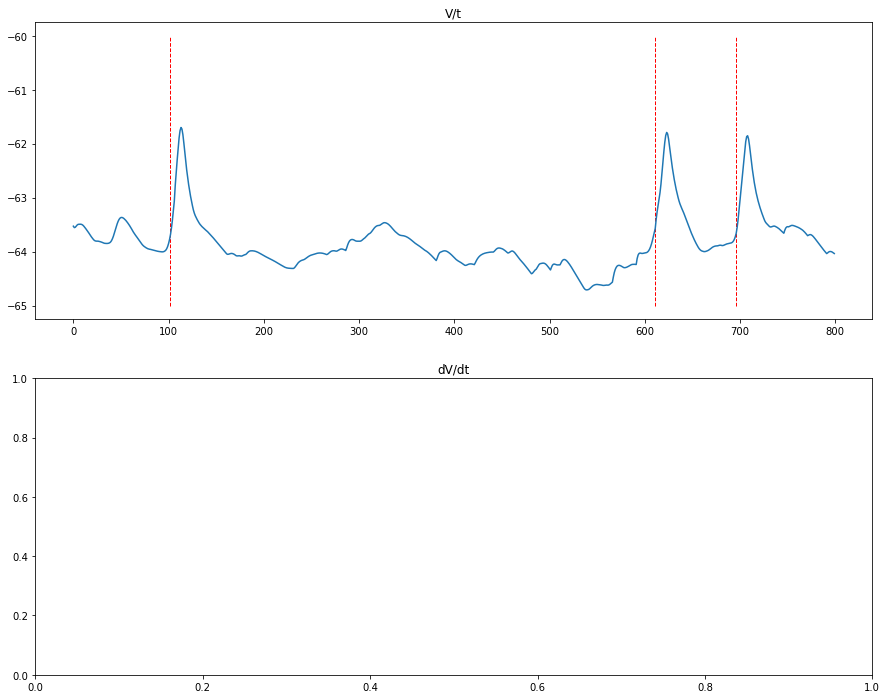

In [6]:
fig, axs = plt.subplots(nrows=2, figsize = (15,12))
axs[0].plot(v.flatten()[400000:450000][15000:30000][2000:4000][1200:])
axs[0].vlines(np.where(spk_loc.flatten()[400000:450000][15000:30000][2000:4000][1200:]==1)[0], ymin=-65,ymax=-60, color="red", linewidth=1, linestyle="--")
axs[0].set_title("V/t")
axs[1].set_title("dV/dt")


T_train = 60 * 1000 * 5
T_test = 10 * 1000 * 5
print(np.sum(spk_loc.flatten()[T_train : T_train+T_test]))
print(np.sum(spk_loc.flatten()[ : T_train]))

In [5]:
np.save("/media/hdd01/sklee/"+mode+"/data/spk_loc.npy", spk_loc)